### 교통사고 데이타셋에서 요일별 사망자수 필터링 + 시각화

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐처리
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [44]:
# 데이타 읽어오기
data=pd.read_csv('data/accidentdata.csv')
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371


(1) 요일별 사망자수 필터링 (groupby() 이용 )

(2) 요일별 사망자수의 합계 (sum() 추가)

(3) 그래프

(1800, 2500)

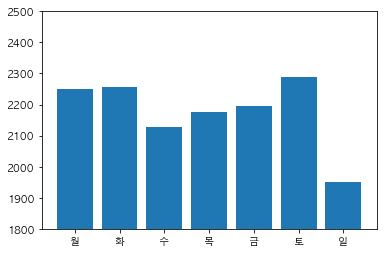

In [68]:
data2 = data.groupby(data['요일'])
# data2=data2.set_index("요일")
data2 = data2.sum()['사망자수'].to_frame().reset_index()
data2 = data2.reindex([3,6,2,1,0,5,4])
data2
plt.bar(data2['요일'], data2['사망자수'])
plt.ylim(1800, 2500)